In [61]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import joblib
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow import keras
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc, ConfusionMatrixDisplay
from sklearn.metrics import classification_report, mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

import warnings
warnings.filterwarnings('ignore')

In [62]:
from sklearn.datasets import fetch_openml

# Fetch dataset Mushroom dari OpenML
mushroom = fetch_openml(name='mushroom', version=1, as_frame=True)

# Memisahkan fitur dan target
X = mushroom.data
y = mushroom.target

# Metadata
print(mushroom.DESCR)

# Variable Information


**Author**: [Jeff Schlimmer](Jeffrey.Schlimmer@a.gp.cs.cmu.edu)  
**Source**: [UCI](https://archive.ics.uci.edu/ml/datasets/mushroom) - 1981     
**Please cite**:  The Audubon Society Field Guide to North American Mushrooms (1981). G. H. Lincoff (Pres.), New York: Alfred A. Knopf 


### Description

This dataset describes mushrooms in terms of their physical characteristics. They are classified into: poisonous or edible.

### Source
```
(a) Origin: 
Mushroom records are drawn from The Audubon Society Field Guide to North American Mushrooms (1981). G. H. Lincoff (Pres.), New York: Alfred A. Knopf 

(b) Donor: 
Jeff Schlimmer (Jeffrey.Schlimmer '@' a.gp.cs.cmu.edu)
```

### Dataset description

This dataset includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family. Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended. This latter class was combined with the

In [63]:
data_df = pd.concat([X, y], axis=1)
data_df.head()

,cap-shape,cap-surface,cap-color,bruises%3F,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,x,s,n,t,p,f,c,n,k,e,...,w,w,p,w,o,p,k,s,u,p
1,x,s,y,t,a,f,c,b,k,e,...,w,w,p,w,o,p,n,n,g,e
2,b,s,w,t,l,f,c,b,n,e,...,w,w,p,w,o,p,n,n,m,e
3,x,y,w,t,p,f,c,n,n,e,...,w,w,p,w,o,p,k,s,u,p
4,x,s,g,f,n,f,w,b,k,t,...,w,w,p,w,o,e,n,a,g,e


In [64]:
data_df.describe(include='all')

,cap-shape,cap-surface,cap-color,bruises%3F,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,6,4,10,2,9,2,2,2,12,2,...,9,9,1,4,3,5,9,6,7,2
top,x,y,n,f,n,f,c,b,b,t,...,w,w,p,w,o,p,w,v,d,e
freq,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,...,4464,4384,8124,7924,7488,3968,2388,4040,3148,4208


In [65]:
X.info()
print ("==========================================================================================")
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   cap-shape                 8124 non-null   category
 1   cap-surface               8124 non-null   category
 2   cap-color                 8124 non-null   category
 3   bruises%3F                8124 non-null   category
 4   odor                      8124 non-null   category
 5   gill-attachment           8124 non-null   category
 6   gill-spacing              8124 non-null   category
 7   gill-size                 8124 non-null   category
 8   gill-color                8124 non-null   category
 9   stalk-shape               8124 non-null   category
 10  stalk-root                5644 non-null   category
 11  stalk-surface-above-ring  8124 non-null   category
 12  stalk-surface-below-ring  8124 non-null   category
 13  stalk-color-above-ring    8124 non-null   catego

In [66]:
(X.isnull().sum())

,0
cap-shape,0
cap-surface,0
cap-color,0
bruises%3F,0
odor,0
gill-attachment,0
gill-spacing,0
gill-size,0
gill-color,0
stalk-shape,0


In [66]:
(X.)

In [67]:
class_counts = data_df['class'].value_counts()
data_df['class'].value_counts()

,count
class,
e,4208
p,3916


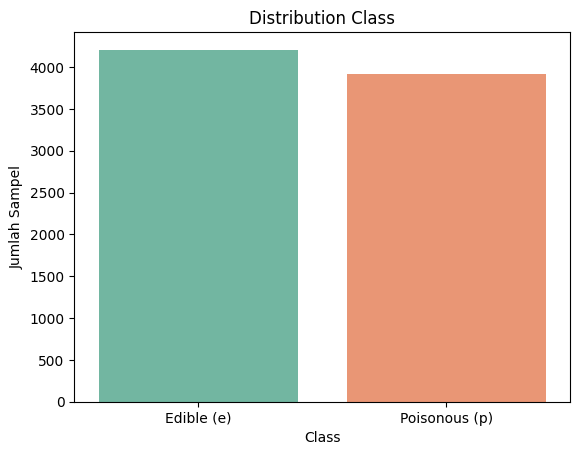

In [68]:
sns.countplot(x=y, palette='Set2')
plt.title('Distribution Class')
plt.xlabel('Class')
plt.ylabel('Jumlah Sampel')
plt.xticks(ticks=[0,1], labels=['Edible (e)', 'Poisonous (p)'])
plt.show()

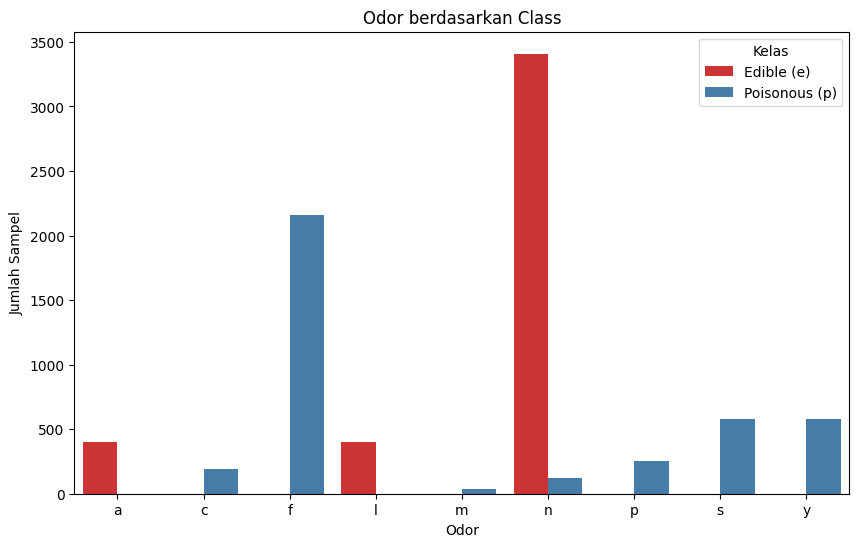

In [69]:
plt.figure(figsize=(10,6))
sns.countplot(x='odor', hue=y, data=X, palette='Set1')
plt.title('Odor berdasarkan Class')
plt.xlabel('Odor')
plt.ylabel('Jumlah Sampel')
plt.legend(title='Kelas', labels=['Edible (e)', 'Poisonous (p)'])
plt.show()

In [70]:
le = LabelEncoder()
X_encoded = X.copy()

for column in X_encoded.columns:
    X_encoded[column] = le.fit_transform(X_encoded[column])

X_encoded.head()

,cap-shape,cap-surface,cap-color,bruises%3F,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,7,7,0,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,7,7,0,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,7,7,0,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,7,7,0,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,7,7,0,2,1,0,3,0,1


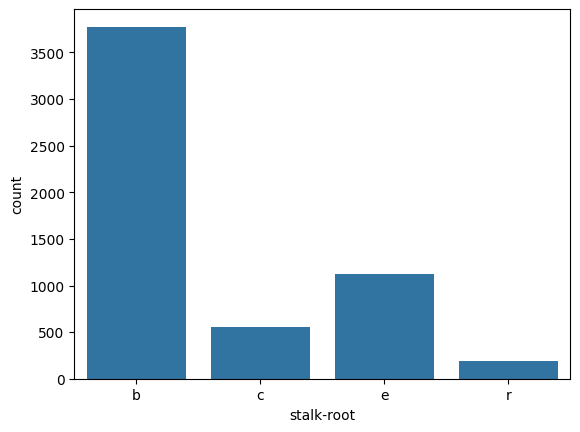

Modus stalk-root: b
Jumlah missing values setelah imputasi: 0


In [71]:
sns.countplot(x='stalk-root', data=X)
plt.title('')
plt.show()

stalk_root_mode = X['stalk-root'].mode()[0]
print(f"Modus stalk-root: {stalk_root_mode}")
X['stalk-root'].fillna(stalk_root_mode, inplace=True)
print(f"Jumlah missing values setelah imputasi: {X['stalk-root'].isnull().sum()}")

In [72]:
le = LabelEncoder()
categorical_columns = data_df.select_dtypes(include=['object', 'category']).columns

for col in categorical_columns:
    data_df[col] = le.fit_transform(data_df[col])

data_df_encoded = data_df.copy()

X = data_df_encoded.drop('class', axis=1)
y = data_df_encoded['class']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

X_scaled.head()


,cap-shape,cap-surface,cap-color,bruises%3F,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1.029712,0.140128,-0.198250,1.185917,0.881938,0.162896,-0.438864,1.494683,-0.228998,-1.144806,...,0.586385,0.622441,0.631991,0.0,0.142037,-0.256132,0.948081,-0.670195,-0.514389,2.030028
1,1.029712,0.140128,1.765874,1.185917,-1.970316,0.162896,-0.438864,-0.669038,-0.228998,-1.144806,...,0.586385,0.622441,0.631991,0.0,0.142037,-0.256132,0.948081,-0.250471,-1.313108,-0.295730
2,-2.087047,0.140128,1.373049,1.185917,-0.544189,0.162896,-0.438864,-0.669038,0.053477,-1.144806,...,0.586385,0.622441,0.631991,0.0,0.142037,-0.256132,0.948081,-0.250471,-1.313108,0.867149
3,1.029712,0.953270,1.373049,1.185917,0.881938,0.162896,-0.438864,1.494683,0.053477,-1.144806,...,0.586385,0.622441,0.631991,0.0,0.142037,-0.256132,0.948081,-0.670195,-0.514389,2.030028
4,1.029712,0.140128,-0.591075,-0.843230,0.406562,0.162896,2.278612,-0.669038,-0.228998,0.873511,...,0.586385,0.622441,0.631991,0.0,0.142037,-0.256132,-1.272216,-0.250471,-2.910546,-0.295730


In [73]:
X = data_df.drop('class', axis=1)
y = data_df['class']

X_encoded = pd.get_dummies(X, drop_first=True)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)
X_scaled = pd.DataFrame(X_scaled, columns=X_encoded.columns)

le = LabelEncoder()
y_final = le.fit_transform(y)

In [74]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_final, test_size=0.2, random_state=42, stratify=y_final
)

print(f'Jumlah data latih: {X_train.shape[0]}')
print(f'Jumlah data uji: {X_test.shape[0]}')

y_train_series = pd.Series(y_train)
y_test_series = pd.Series(y_test)

print("\nDistribusi Class - Training Set:")
print(y_train_series.value_counts(normalize=True))

print("\nDistribusi Class - Testing Set:")
print(y_test_series.value_counts(normalize=True))


Jumlah data latih: 6499
Jumlah data uji: 1625

Distribusi Class - Training Set:
0    0.517926
1    0.482074
Name: proportion, dtype: float64

Distribusi Class - Testing Set:
0    0.518154
1    0.481846
Name: proportion, dtype: float64


In [75]:
y_train_series = pd.Series(y_train)
y_test_series = pd.Series(y_test)

print("Jumlah Class di training set:")
print(y_train_series.value_counts())

print("\nJumlah Class di testing set:")
print(y_test_series.value_counts())

Jumlah Class di training set:
0    3366
1    3133
Name: count, dtype: int64

Jumlah Class di testing set:
0    842
1    783
Name: count, dtype: int64


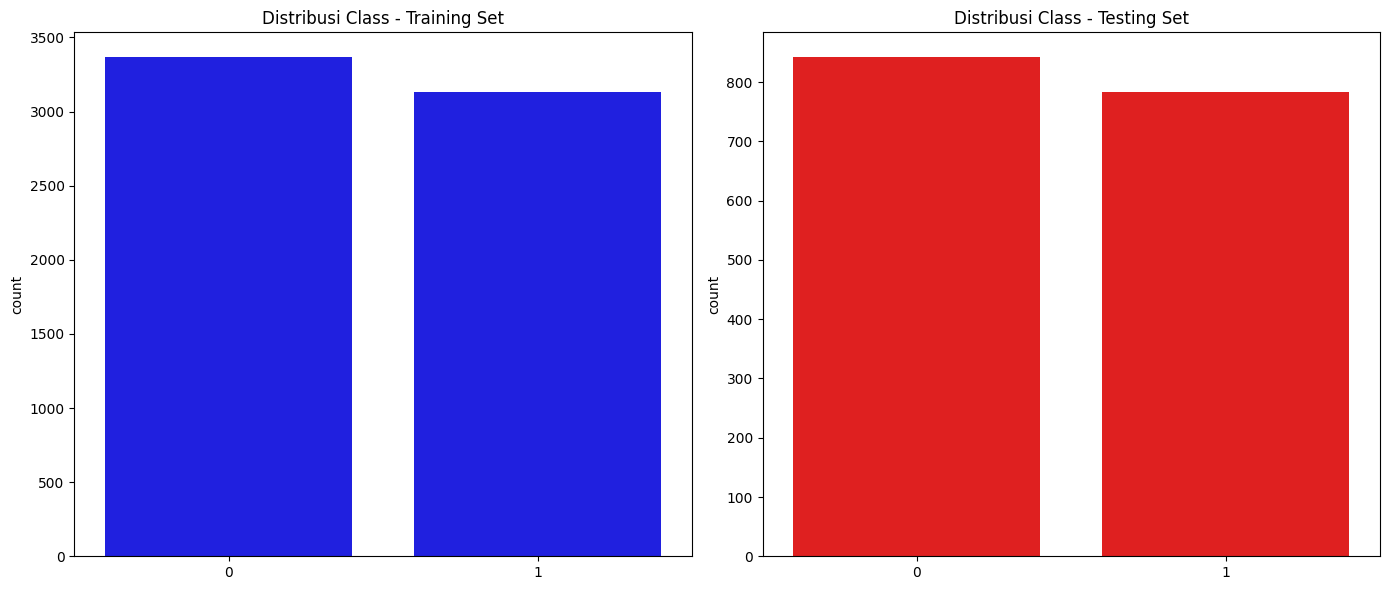

In [76]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.countplot(x=y_train, ax=axes[0], color='blue')
axes[0].set_title('Distribusi Class - Training Set')

sns.countplot(x=y_test, ax=axes[1], color='red')
axes[1].set_title('Distribusi Class - Testing Set')

plt.tight_layout()
plt.show()

In [77]:
svm_model = SVC(kernel='linear', probability=True, random_state=42)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm))

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.96      0.97       842
           1       0.96      0.97      0.96       783

    accuracy                           0.97      1625
   macro avg       0.97      0.97      0.97      1625
weighted avg       0.97      0.97      0.97      1625



In [78]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

print("K-NN Classification Report:")
print(classification_report(y_test, y_pred_knn))

K-NN Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       842
           1       1.00      1.00      1.00       783

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [79]:
linreg_model = LinearRegression()

linreg_model.fit(X_train, y_train)
y_pred_linreg = linreg_model.predict(X_test)
y_pred_linreg_class = (y_pred_linreg >= 0.5).astype(int)
print("Linear Regression Classification Report:")
print(classification_report(y_test, y_pred_linreg_class))

mse = mean_squared_error(y_test, y_pred_linreg)
mae = mean_absolute_error(y_test, y_pred_linreg)
r2 = r2_score(y_test, y_pred_linreg)

Linear Regression Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.96      0.95       842
           1       0.95      0.94      0.95       783

    accuracy                           0.95      1625
   macro avg       0.95      0.95      0.95      1625
weighted avg       0.95      0.95      0.95      1625



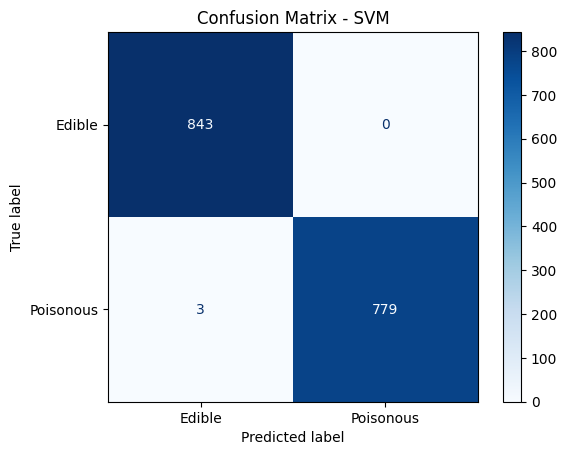

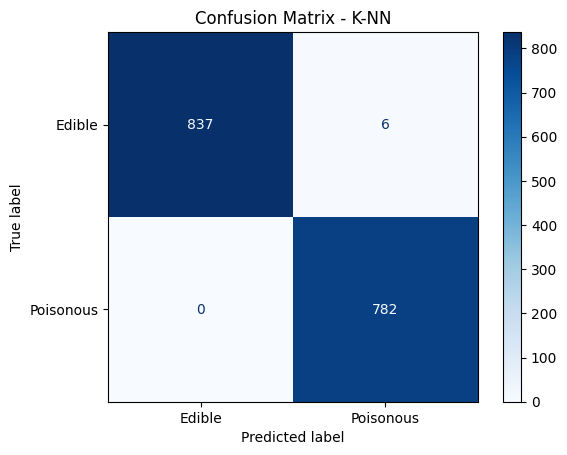

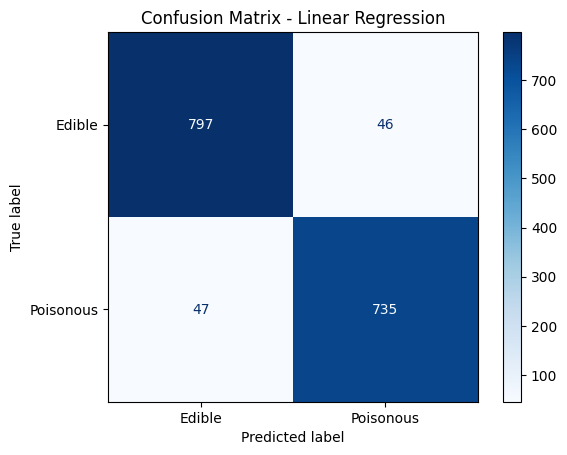

In [80]:
X = data_df_encoded.drop('class', axis=1)
y = data_df_encoded['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svm_model = SVC()
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

cm_svm = confusion_matrix(y_test, y_pred_svm)
disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels=['Edible', 'Poisonous'])
disp_svm.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix - SVM')
plt.show()

knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

cm_knn = confusion_matrix(y_test, y_pred_knn)
disp_knn = ConfusionMatrixDisplay(confusion_matrix=cm_knn, display_labels=['Edible', 'Poisonous'])
disp_knn.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix - K-NN')
plt.show()

linreg_model = LinearRegression()
linreg_model.fit(X_train, y_train)
y_pred_linreg = linreg_model.predict(X_test)
y_pred_linreg_class = (y_pred_linreg >= 0.5).astype(int)

cm_linreg = confusion_matrix(y_test, y_pred_linreg_class)
disp_linreg = ConfusionMatrixDisplay(confusion_matrix=cm_linreg, display_labels=['Edible', 'Poisonous'])
disp_linreg.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Linear Regression')
plt.show()


In [81]:
accuracy_svm = accuracy_score(y_test, y_pred_svm)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
accuracy_linreg = accuracy_score(y_test, y_pred_linreg_class)

print(f'Akurasi SVM: {accuracy_svm:.4f}')
print(f'Akurasi K-NN: {accuracy_knn:.4f}')
print(f'Akurasi Linear Regression: {accuracy_linreg:.4f}')

Akurasi SVM: 0.9982
Akurasi K-NN: 0.9963
Akurasi Linear Regression: 0.9428


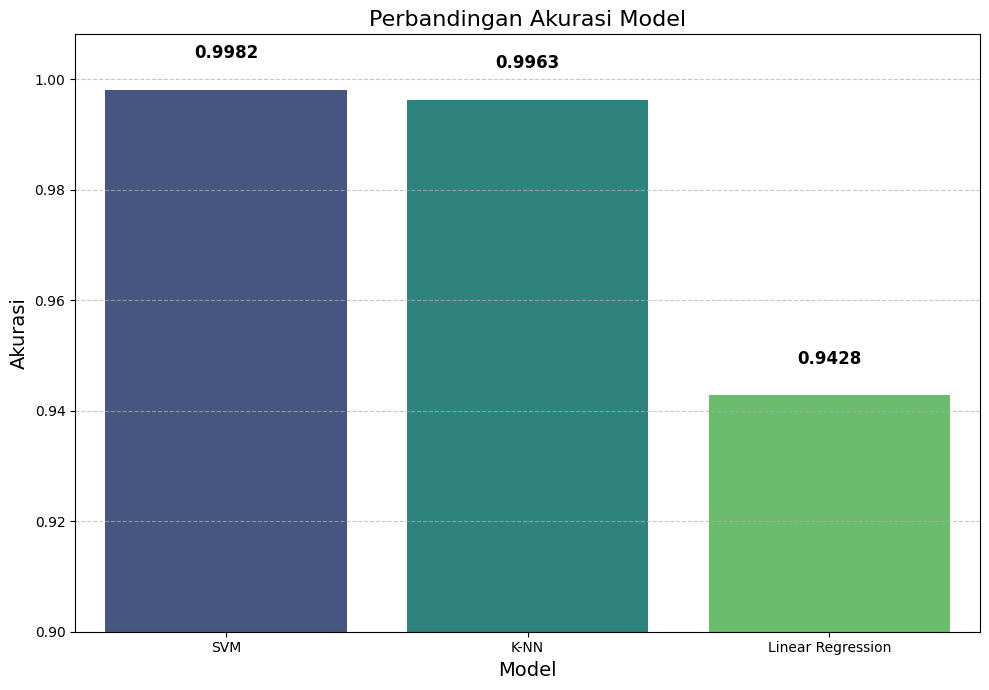

In [82]:
models = ['SVM', 'K-NN', 'Linear Regression']
accuracies = [accuracy_svm, accuracy_knn, accuracy_linreg]

for acc in accuracies:
    if not (0 <= acc <= 1):
        raise ValueError("Nilai akurasi harus berada dalam rentang 0 hingga 1.")

plt.figure(figsize=(10, 7))
sns.barplot(x=models, y=accuracies, palette='viridis')

y_max = max(accuracies) + 0.01
y_max = min(y_max, 1.5)
plt.ylim(0.90, y_max)

plt.title('Perbandingan Akurasi Model', fontsize=16)
plt.xlabel('Model', fontsize=14)
plt.ylabel('Akurasi', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for i, v in enumerate(accuracies):
    plt.text(i, v + 0.005, f"{v:.4f}", ha='center', va='bottom', fontweight='bold', fontsize=12)

plt.tight_layout()
plt.show()

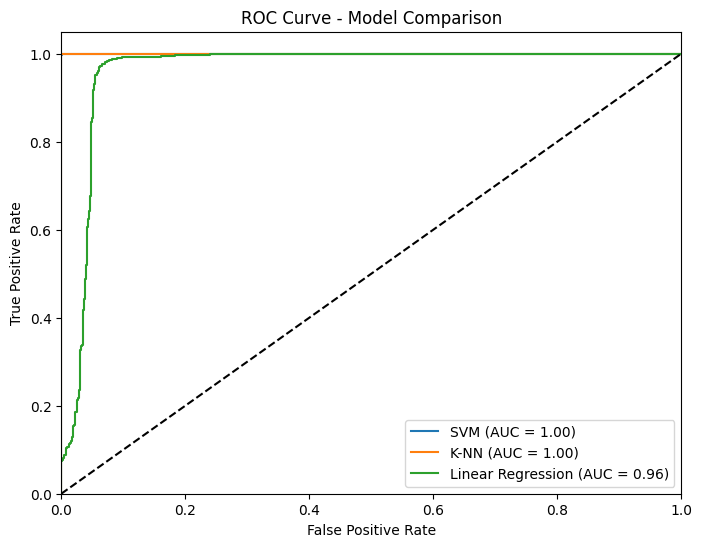

In [83]:
y_prob_svm = svm_model.decision_function(X_test)
y_prob_knn = knn_model.predict_proba(X_test)[:,1]
y_prob_linreg = linreg_model.predict(X_test)

fpr_svm, tpr_svm, _ = roc_curve(y_test, y_prob_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)

fpr_knn, tpr_knn, _ = roc_curve(y_test, y_prob_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)

fpr_linreg, tpr_linreg, _ = roc_curve(y_test, y_prob_linreg)
roc_auc_linreg = auc(fpr_linreg, tpr_linreg)

plt.figure(figsize=(8,6))
plt.plot(fpr_svm, tpr_svm, label=f'SVM (AUC = {roc_auc_svm:.2f})')
plt.plot(fpr_knn, tpr_knn, label=f'K-NN (AUC = {roc_auc_knn:.2f})')
plt.plot(fpr_linreg, tpr_linreg, label=f'Linear Regression (AUC = {roc_auc_linreg:.2f})')
plt.plot([0,1], [0,1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Model Comparison')
plt.legend(loc='lower right')
plt.show()


In [84]:
mse_linreg = mean_squared_error(y_test, y_pred_linreg)
mae_linreg = mean_absolute_error(y_test, y_pred_linreg)
r2_linreg = r2_score(y_test, y_pred_linreg)

print(f'Mean Squared Error (Linear Regression): {mse_linreg:.4f}')
print(f'Mean Absolute Error (Linear Regression): {mae_linreg:.4f}')
print(f'R2 Score (Linear Regression): {r2_linreg:.4f}')

Mean Squared Error (Linear Regression): 0.0652
Mean Absolute Error (Linear Regression): 0.1732
R2 Score (Linear Regression): 0.7388


In [85]:
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [86]:
epochs = 20

history = model.fit(
    X_train, y_train,
    epochs=epochs,
    validation_data=(X_test, y_test),
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/20
204/204 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5877 - loss: 0.8176 - val_accuracy: 0.8640 - val_loss: 0.3705
Epoch 2/20
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8088 - loss: 0.4193 - val_accuracy: 0.9200 - val_loss: 0.2398
Epoch 3/20
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8724 - loss: 0.3062 - val_accuracy: 0.9428 - val_loss: 0.1587
Epoch 4/20
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9167 - loss: 0.2220 - val_accuracy: 0.9514 - val_loss: 0.1192
Epoch 5/20
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9370 - loss: 0.1750 - val_accuracy: 0.9649 - val_loss: 0.0849
Epoch 6/20
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9515 - loss: 0.1340 - val_accuracy: 0.9717 - val_loss: 0.0640
Epoch 7/20
204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9677 - loss: 0.1016 - val_accuracy: 0.9754 - val_loss: 0.0491
Epoch 8/20
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9660 - loss: 0.0937 - val_accuracy: 0.

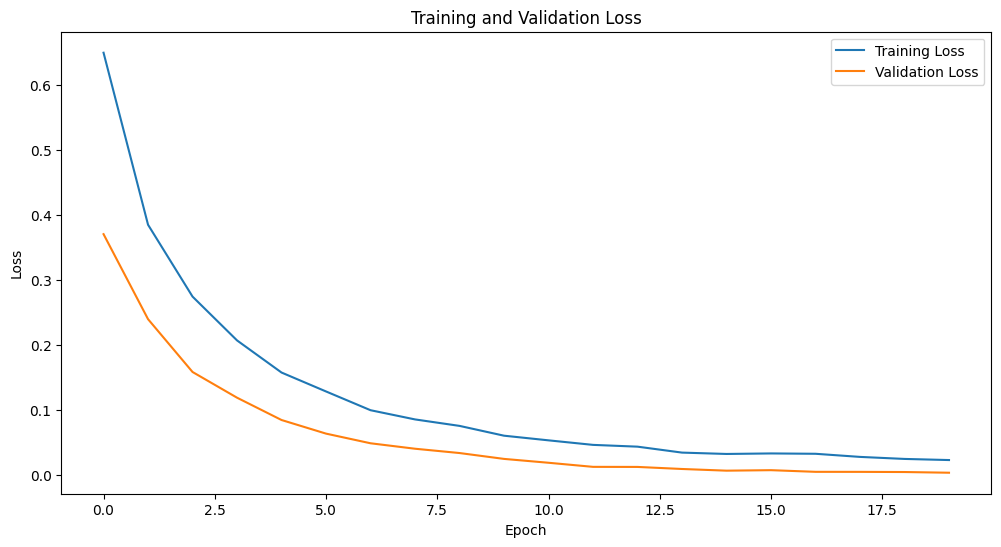

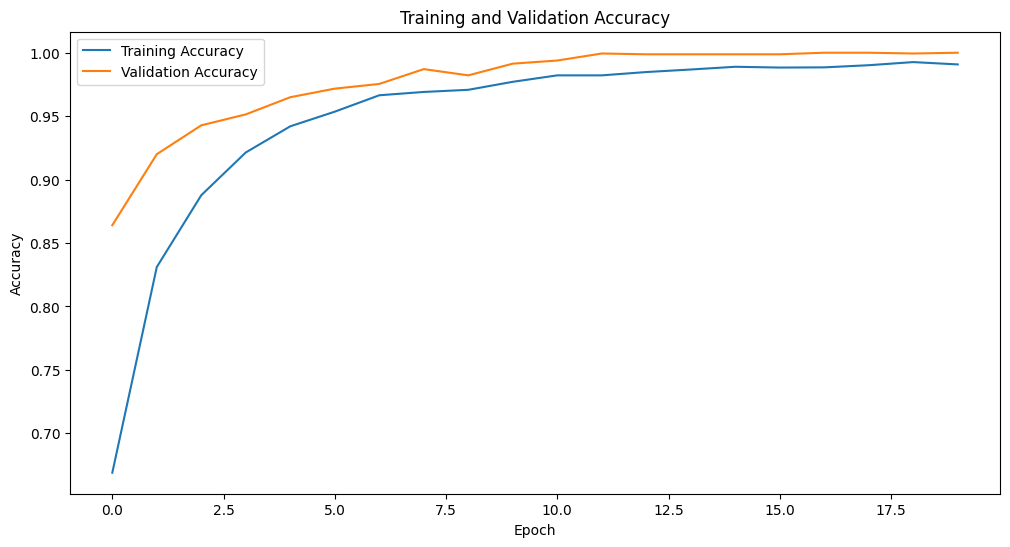

In [87]:
plt.figure(figsize=(12,6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

plt.figure(figsize=(12,6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()